In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file = '012.wav'

In [ ]:
# load audio file with Librosa
# 1sec of audio file containing 22050 samples
# so signal containing the amplitude of sr * duration of audio
signal, sample_rate = librosa.load(file, sr=22050)

## Waveform- Display

Text(0.5, 1.0, 'Waveform')

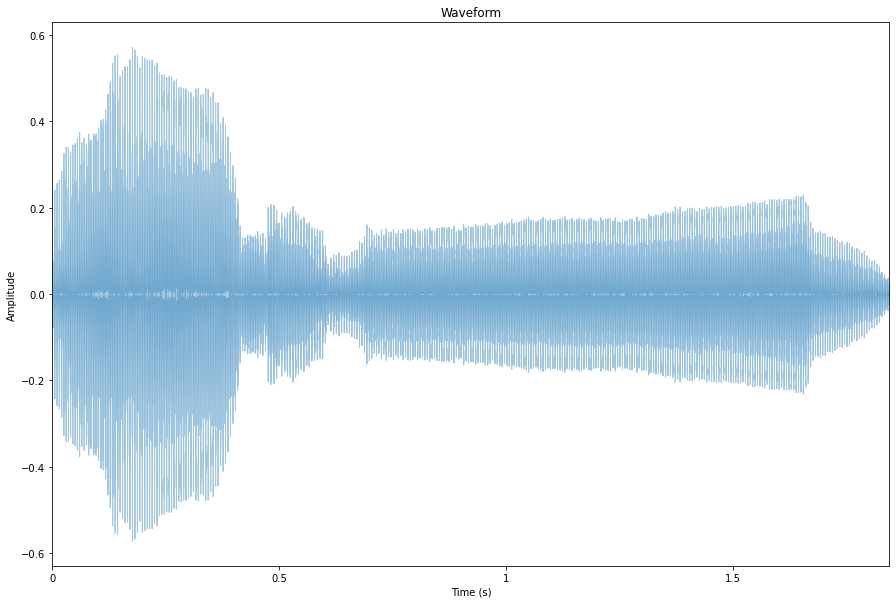

In [ ]:
# WAVEFORM
# display waveform
FIG_SIZE = (15,10)
plt.figure(figsize=FIG_SIZE)
# alpha - is like the opacity of waveform range(0-1), alpha < 1 is preferred for better visualization
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

##FFT - Power Spectrogram
from time domain to frequency domain

In [ ]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)
# fft - is a one dimensional array, which has as many values as the total number of samples in the waveform
# each value contain the complex part as well, but we need only magnitude

In [ ]:
# calculate abs values on complex numbers to get magnitude
# this magnitude shows the contribution of each frequency sample in sound
spectrum = np.abs(fft)

# create frequency variable
# linspace evenly divide the array 
f = np.linspace(0, sample_rate, len(spectrum))

# a little detail why we take half of the spectrum
# The power spectrum is the magnitude squared of the Fourier Transform, which means that it contains the squared magnitudes of the positive and negative frequencies of the signal.
# Therefore, when we plot the power spectrum, we see the same magnitude values for positive and negative frequencies, which results in a symmetric plot.
# the power spectrum is symmetrical, but only the positive frequencies need to be plotted.

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power spectrum')

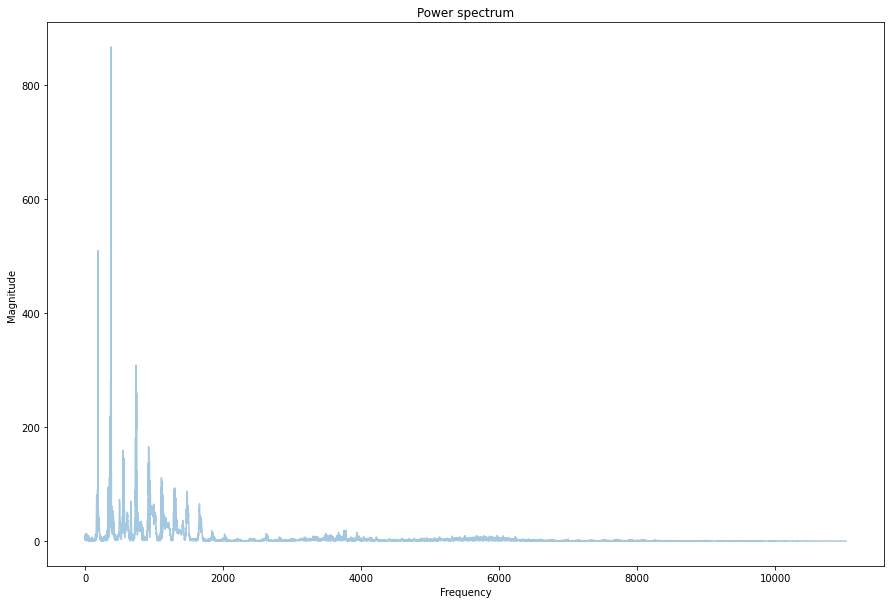

In [ ]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

## STFT -> spectrogram

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# basically n_fft is the total window and we slide on this window with hop_length (no of samples) to the right


# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [ ]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

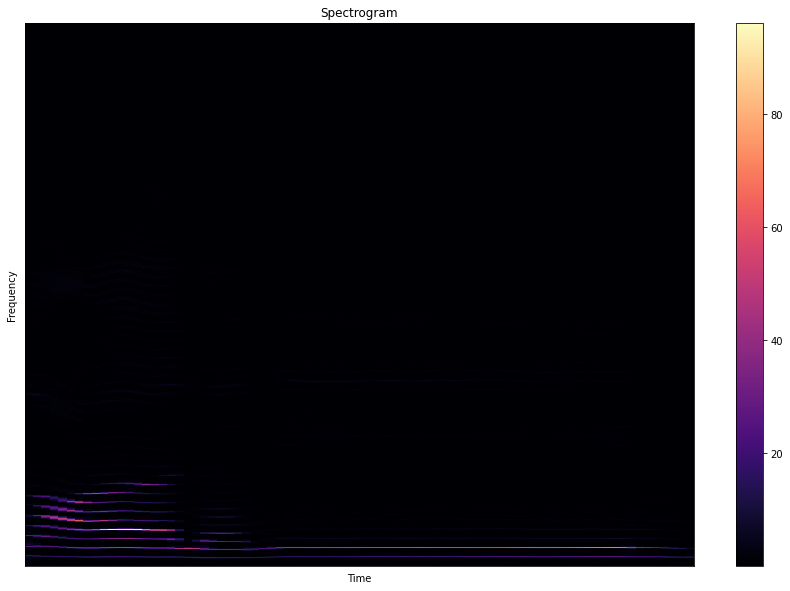

In [ ]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
# same as heatmap, 
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

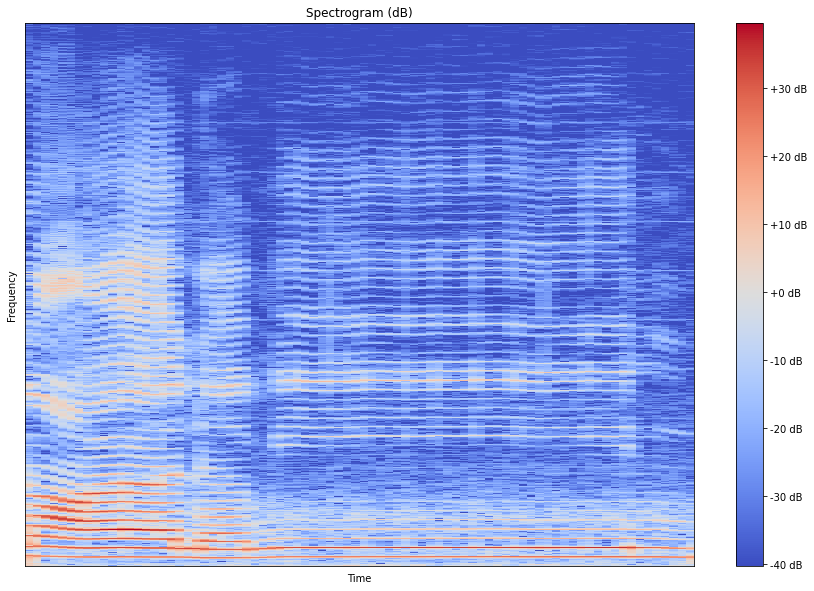

In [ ]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
# Human perception of sound is logarithmic - 
# By converting the linear amplitude spectrogram to a dB scaled spectrogram, we can better represent the perceptual loudness of the signal.

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

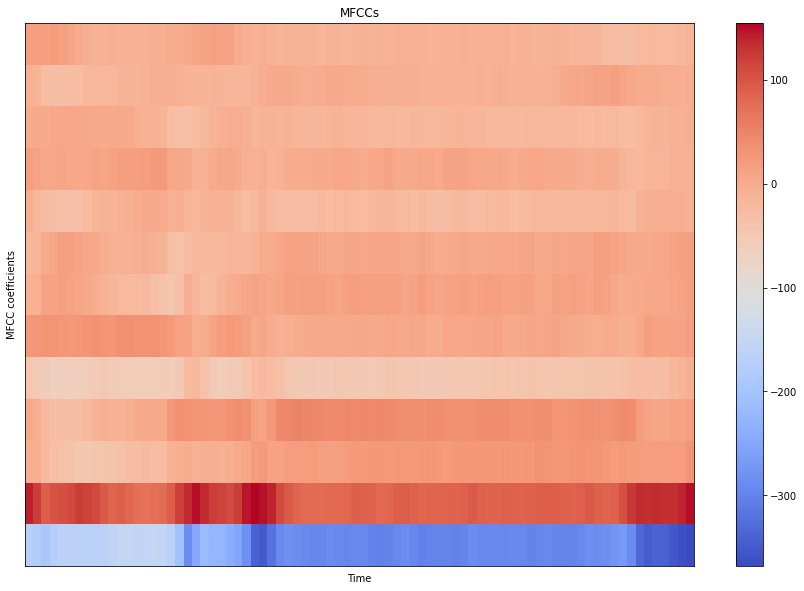

In [ ]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()